In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
# Prepare the data
combined_data = pd.merge(gdp_per_capita, oecd_bli, on=['Country'])

gdp_value = combined_data[['2015']].copy()
bli_value = combined_data[['Value']].copy()

gdp_value.columns = ['GDP per capita']
bli_value.columns = ['Life satisfaction']

country_stats = pd.concat([gdp_value, bli_value], axis=1)

print (country_stats)

      GDP per capita  Life satisfaction
0          50961.865               1.10
1          50961.865               1.10
2          50961.865               1.10
3          50961.865              20.00
4          50961.865              20.00
...              ...                ...
3213       55805.204              15.58
3214       55805.204               6.74
3215       55805.204              14.27
3216       55805.204              14.39
3217       55805.204              14.12

[3218 rows x 2 columns]


In [4]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

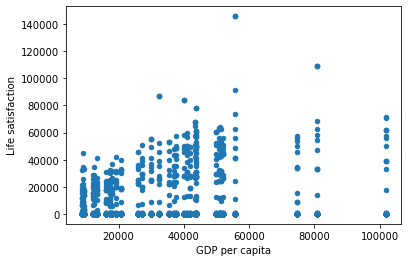

In [5]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [6]:
# Select a linear model
from sklearn import linear_model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [7]:
# Train the model
lin_reg_model.fit(X, y)

LinearRegression()

In [8]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) 

[[3806.22078376]]


In [9]:
from sklearn import neighbors
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
clf.fit(X, y)

X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new))

[[3806.22078376]]
